# Stat 301 Project stage 1

* Group 24 Haoxi Jiang

## Section 0: TA feedback

### Score for Project stage 1: 30 

### there is no TA feedback for my Project stage 1 

## Section 1: Data Description

### Summary
The dataset we were assigned is `Online Shoppers Purchasing Intention Dataset`, this dataset contains 12,330 observations and have 18 variables, 10 are numerical, and 8 are categorical describing the shopping intensions of online shopers. We are specificaly asked to use the data outside Region 1

* Variables: `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, `Product Related Duration`, `Bounce Rate`, `Exit Rate`,`Page Value`, `Special Day`, `Month`,`OperatingSystems`,`Browser`,`Region`,`TrafficType`,`VisitorType`,`Weekend`,`Revenue`

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* The `Bounce Rate`, `Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of `Bounce Rate` feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

* The value of `Exit Rate` feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

* The `Page Value` feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

* The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

* The dataset also includes `operating system`, `browser`, `region`, `traffic type` but the exact mapping was not provided by the data source.

*  `visitor type` as returning or new visitor, a Boolean value indicating whether the date of the visit is `weekend`, and month of the year.

### Source and Information

This dataset was collected by **C. Okan Sakar and Sule Yildirim Sariyildiz** from a real online retail website, covering a **one-year** period from May 2015 to May 2016. It was published as part of the paper “Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks” in Neural Computing and Applications (2019).

* **Source**: UCI Machine Learning Repository — Online Shoppers Purchasing Intention Dataset
* **DOI**: 10.24432/C5F88Q

### Preselect variables
We were asked to use the data outside of region 1 so we will exclude data from region 1 first. For the modeling stage, certain variables will be excluded because they add limited interpretive or predictive value. Specifically, `OperatingSystems`, `Browser`, `Region`, and `TrafficType` may be dropped since the dataset does not provide a clear mapping of their numeric codes. Additionally, features such as `BounceRates` and `ExitRates` will be evaluated for potential redundancy, as both measure user exit behavior. The remaining variables will be retained for exploring behavioral factors that influence purchase likelihood (`Revenue`)

## Section 2: Scientific Question

### Research Question: 
* In this project, we aim to examine the relationship between online shoppers’ engagement with product pages and their likelihood of completing a purchase. Specifically, our question is:

**How are the time spent on product pages (`ProductRelated_Duration`) and the average page value (`PageValues`) associated with whether a visitor makes a purchase (`Revenue`)?**

* The response variable is `Revenue`, a Boolean variable indicating whether a session ended with a purchase. The explanatory variables are `ProductRelated_Duration` (continuous), representing how long the visitor spent viewing product-related pages, and `PageValues` (continuous), reflecting the average value of the pages visited before a transaction.

This question focuses primarily on inference, as we aim to understand which aspects of user engagement are most strongly associated with purchase behavior. However, it also provides insight into potential predictors that could later be used for prediction.

## Section 3 Exploratory Data Analysis and Visualization

In [7]:
library(broom)
library(tidyverse)
library(cowplot)
library(ggplot2)

In [2]:
#Load Dataset into R
OSPI <- read_csv("online_shoppers_intention.csv")
head(OSPI)

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [3]:

OSPI_clean <- OSPI %>%
  # 1. Remove Region 1
  filter(Region != 1) %>%
  # 2. Keep relevant variables
  select(
    ProductRelated_Duration, PageValues, Revenue,
    Month, VisitorType, Weekend, Region
  ) %>%
  # 3. Drop zero-engagement sessions
  filter(ProductRelated_Duration > 0, PageValues > 0) %>%
  # 4. Convert categorical variables to factors
  mutate(
    Revenue = as.factor(Revenue),
    Month = as.factor(Month),
    VisitorType = as.factor(VisitorType),
    Weekend = as.factor(Weekend),
    Region = as.factor(Region)
  )
head(OSPI_clean)

ProductRelated_Duration,PageValues,Revenue,Month,VisitorType,Weekend,Region
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
998.7417,19.447079,FALSE,Feb,Returning_Visitor,FALSE,4
1553.5833,38.308493,FALSE,Feb,Returning_Visitor,FALSE,3
798.3333,22.916036,TRUE,Feb,Returning_Visitor,FALSE,3
607.0000,17.535959,TRUE,Feb,Returning_Visitor,TRUE,7
927.4500,8.000741,FALSE,Mar,Returning_Visitor,FALSE,3
1868.8197,1.706015,TRUE,Mar,Returning_Visitor,FALSE,7


We pre-selected variables related to visitor engagement and purchase outcome to focus our analysis on behavioral factors. The cleaned dataset includes `ProductRelated_Duration`, `PageValues`, and `Revenue` as core variables, along with contextual covariates such as `Month`, `VisitorType`, and `Weekend`. Observations from Region 1 and sessions with zero page value or zero time spent on product pages were excluded to capture only meaningful browsing activity. All categorical variables were converted to factor type to support exploratory plots and modeling.

`summarise()` has grouped output by 'Duration_Level'. You can override using
the `.groups` argument.


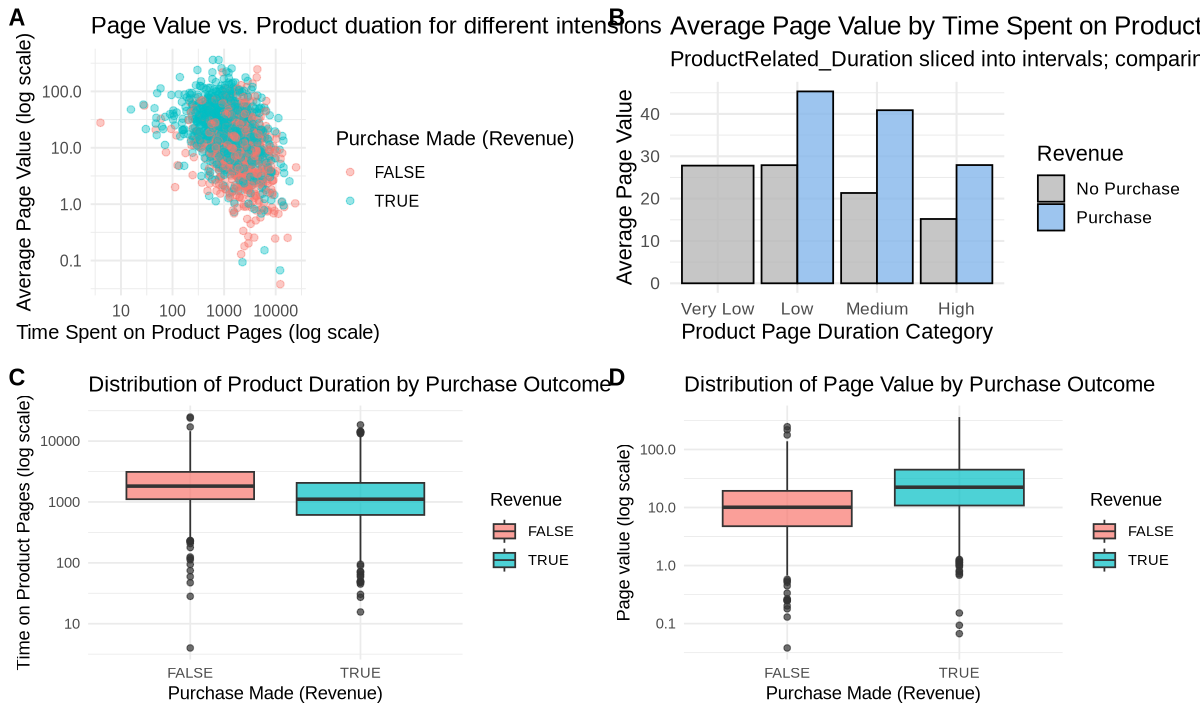

In [4]:
options(repr.plot.width = 10, repr.plot.height = 6)
# Visualization: relationship among PageValues, ProductRelated_Duration, and Revenue
p1<- ggplot(OSPI_clean , aes(x = ProductRelated_Duration,
                 y = PageValues,
                 color = Revenue)) +
  geom_point(alpha = 0.4, size = 1.8)+
  scale_x_log10() +
  scale_y_log10() +
  labs(
    title = "Page Value vs. Product duation for different intensions",
    x = "Time Spent on Product Pages (log scale)",
    y = "Average Page Value (log scale)",
    color = "Purchase Made (Revenue)"
  ) +
  theme_minimal(base_size = 12)


OSPI2 <- OSPI_clean%>% mutate(
    Duration_Level = cut(
      ProductRelated_Duration,
      breaks = c(0, 10, 100, 1000, max(ProductRelated_Duration, na.rm = TRUE)),
      labels = c("Very Low", "Low", "Medium", "High"),
      include.lowest = TRUE
    )
  )

# Summarize PageValue by Duration bins
summary_df <- OSPI2%>%
  group_by(Duration_Level, Revenue) %>%
  summarise(
    MeanPageValue = mean(PageValues, na.rm = TRUE),
    n = n()
  )

# Plot the histogram (bar chart)
p2 <- ggplot(summary_df, aes(x = Duration_Level, y = MeanPageValue, fill = Revenue)) +
  geom_col(position = "dodge", color = "black", alpha = 0.8) +
  scale_fill_manual(values = c("#B8B8B8", "#84B6EB"), labels = c("No Purchase", "Purchase")) +
  labs(
    title = "Average Page Value by Time Spent on Product Pages",
    subtitle = "ProductRelated_Duration sliced into intervals; comparing purchase vs non-purchase sessions",
    x = "Product Page Duration Category",
    y = "Average Page Value",
    fill = "Revenue"
  ) +
  theme_minimal(base_size = 13)

p3 <- ggplot(OSPI_clean, aes(x = Revenue, y = ProductRelated_Duration, fill = Revenue)) +
  geom_boxplot(alpha = 0.7) +
scale_y_log10()+
  labs(title = "Distribution of Product Duration by Purchase Outcome",
       x = "Purchase Made (Revenue)", y = "Time on Product Pages (log scale)") +
  theme_minimal()

p4<-ggplot(OSPI_clean, aes(x = Revenue, y = PageValues, fill = Revenue)) +
  geom_boxplot(alpha = 0.7) +
scale_y_log10()+
  labs(title = "Distribution of Page Value by Purchase Outcome",
       x = "Purchase Made (Revenue)", y = "Page value (log scale)") +
  theme_minimal()

p1 <- p1 + theme(plot.margin = margin(10, 10, 10, 10))
p2 <- p2 + theme(plot.margin = margin(10, 10, 10, 10))
p3 <- p3 + theme(plot.margin = margin(10, 10, 10, 10))
p4 <- p4 + theme(plot.margin = margin(10, 10, 10, 10))

# Create top and bottom rows
top_row <- plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))
bottom_row <- plot_grid(p3, p4, labels = c("C", "D"), ncol = 2, rel_widths = c(1, 1))

# Combine into a 2x2 layout
final_plot_2x2 <- plot_grid(
  top_row,
  bottom_row,
  ncol = 1,
  rel_heights = c(1, 1)   # balance top and bottom rows equally
)

final_plot_2x2

## Interpretations

* Plot A displays a scatter plot of Page Value versus Time Spent on Product Pages, colored by purchase outcome (`Revenue = TRUE/FALSE`). Both axes are plotted on a **logarithmic scale** to correct for the extreme right-skewness of the data — most sessions record very short durations and low page values, while a few have exceptionally high values. The log transformation compresses these large outliers, allowing clearer visualization of patterns among the majority of observations. The plot shows that sessions resulting in purchases (`TRUE`) tend to occupy higher regions of the Page Value axis, suggesting stronger engagement or higher-value interactions.

* For plot B, I cut the product duration into 4 different levels form **0-10s(very low), 10-100s(low), 100 - 1000s(medium), above 1000s(high)**, so I can treat them as a categorical variable and produced a histogram of the average page value for different level of product duration among purchases. Purchases consistently exhibit higher mean page values across all categories, especially in the “Low” and “Medium” ranges, implying that moderate browsing durations are most conducive to purchases, while extremely short or long visits may reflect disinterest or indecision.

* Plot C compares Product-Related Duration between purchase outcomes using a **box plot** with a **log-scaled** y-axis. Similar to Panel A, the scaling was applied to handle large variation and skew, making median and spread comparisons meaningful. Both groups show wide variability, but purchases (`TRUE`) exhibit slightly lower median duration and fewer extreme outliers, indicating that buyers often make decisions more efficiently.

* Panel D visualizes the Page Value distribution by purchase outcome, also using a **log-scaled** y-axis for interpretability. The purchase group shows a higher median and broader spread, confirming that sessions leading to purchases typically accumulate greater value per visit.

* Collectively, the four plots reveal that **purchase behavior is positively associated with both time spent and page value**, and log-scaling was necessary to accurately visualize these highly skewed engagement variables.

## Section 4: Method and Plan

### Method

Since the response variabel `Revenue` is binomial(0/1) I am planing to use logist regression. Logistic regression is suitable because it models the probability of a binary outcome as a function of multiple explanatory variables, such as PageValues, ProductRelated_Duration. It allows us to quantify how user engagement metrics influence the likelihood of purchase.

### Assumptions

To apply logistic regression, several assumptions are required: observations must be **independent**, the log-odds of the response should have a **linear relationship** with the predictors, and the model should **avoid severe multicollinearity**.

### Limitation

Logistic regression assumes a linear relationship in log-odds space, which may oversimplify nonlinear user behaviors. It is also sensitive to outliers and imbalance between purchase and non-purchase cases.

### Section 5: Computational code and output

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.112655e-01,1.000748e-01,-2.111076,3.476576e-02
PageValues,2.595563e-02,2.731359e-03,9.502826,2.042706e-21
ProductRelated_Duration,-9.266649e-05,2.538553e-05,-3.650367,2.618662e-04


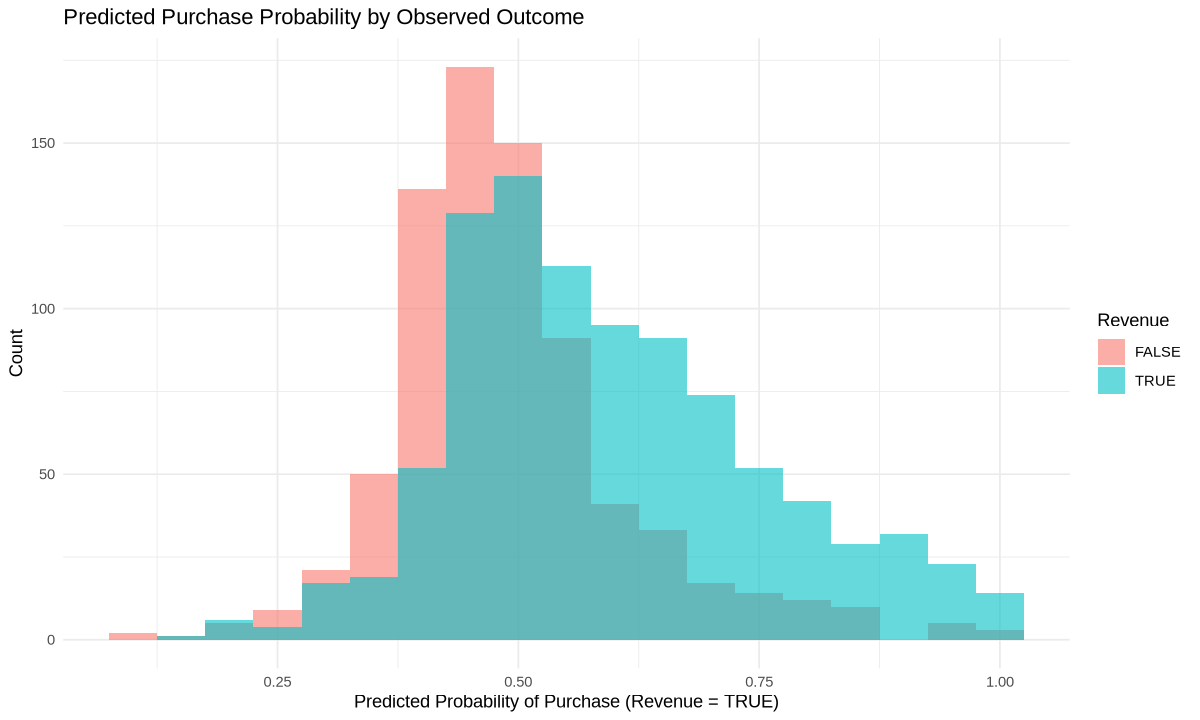

In [9]:

# Logistic regression model to predict Revenue (Purchase)
model_logit <- glm(Revenue ~ PageValues + ProductRelated_Duration,
                   data = OSPI_clean,
                   family = "binomial")

# Summarize model results
tidy(model_logit,confi.int = true)

# Optional: visualize predicted probabilities vs actual outcomes
OSPI_clean$predicted_prob <- predict(model_logit, type = "response")

ggplot(OSPI_clean, aes(x = predicted_prob, fill = Revenue)) +
  geom_histogram(binwidth = 0.05, position = "identity", alpha = 0.6) +
  labs(title = "Predicted Purchase Probability by Observed Outcome",
       x = "Predicted Probability of Purchase (Revenue = TRUE)",
       y = "Count") +
  theme_minimal()

Based on the summary of the model, the page value have a positive coefficent suggesting that one unit increase in the PageValue, the log odds of purchase will increse by 0.02595 while keep other variables constant, and one unit increase in the product related duration is associated with a decrease of log odds of purchase of 0.0000923, this may suggesting that excessively long browsing time may reduce purchase likelihood,. The histogram of predicted probabilities shows that the model reasonably distinguishes purchasing sessions from non-purchasing ones, with purchase sessions clustering toward higher predicted probabilities.